In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import hdf5plugin
import time
import os

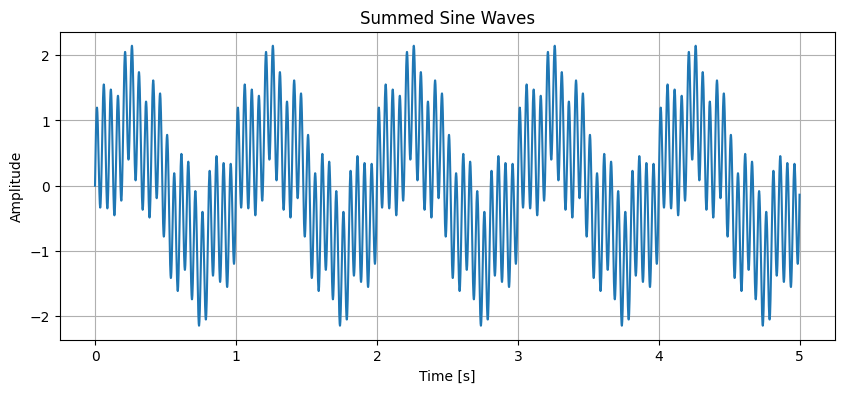

In [2]:
# Define parameters
sampling_rate = 1000  # samples per second
duration = 5  # seconds
frequencies = [1, 5, 10, 20]  # frequencies of the sine waves

# Generate time axis
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine waves and sum them
data = np.zeros_like(t)
for freq in frequencies:
    A = np.random.rand()
    data += A*np.sin(2 * np.pi * freq * t)

# Plot the resulting wave
plt.figure(figsize=(10, 4))
plt.plot(t, data)
plt.title('Summed Sine Waves')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

def generate_data():
    # Generate time axis
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate sine waves and sum them
    data = np.zeros_like(t)
    for freq in frequencies:
        A = np.random.rand()
        data += A*np.sin(2 * np.pi * freq * t)

    return t, data

In [3]:
start_time = time.perf_counter()
with h5py.File('uncompressed_data.h5', 'w') as f:
    n = 500
    _tmp_data = np.zeros((int(sampling_rate * duration),n), dtype=np.float32)
    for i in range(n):
        t, data = generate_data()
        _tmp_data[:,i] = data
    f.create_dataset('data', data=_tmp_data, compression=None)
end_time = time.perf_counter()
print(f"Uncompressed data file created in {1e6*(end_time - start_time)} us")
print(f"Uncompressed file size: {os.path.getsize('uncompressed_data.h5')/1e6} MB")

Uncompressed data file created in 81425.10000106995 us
Uncompressed file size: 10.002048 MB


In [4]:
start_time = time.perf_counter()
with h5py.File('compressed_data.h5', 'w') as f:
    n = 500
    _tmp_data = np.zeros((int(sampling_rate * duration),n), dtype=np.float32)
    for i in range(n):
        t, data = generate_data()
        _tmp_data[:,i] = data
    f.create_dataset('data', data=data, compression=hdf5plugin.Zstd())
end_time = time.perf_counter()
print(f"compressed data file created in {1e6*(end_time - start_time)} us")
print(f"compressed file size: {os.path.getsize('compressed_data.h5')/1e6} MB")
print(f"compression ratio: {os.path.getsize('uncompressed_data.h5')/os.path.getsize('compressed_data.h5')}")

compressed data file created in 110233.69999747956 us
compressed file size: 0.031153 MB
compression ratio: 321.0621127981254
